In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')
train_set=data_train.iloc[:, 1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

We use normalization in the case of RNN


In [0]:
 from sklearn.preprocessing import MinMaxScaler
 sc=MinMaxScaler(feature_range=(0,1))
 training_set=sc.fit_transform(train_set)
 training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Create a special data strucure with 60 time steps to let the RNN know what to learn.
Predict output from past 60 past financial trends.

In [0]:
X_train=[]
y_train=[]
for i in range(120,1258):
  X_train.append(training_set[i-60:i,0])
  y_train.append(training_set[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train)
print(y_train)

[[0.08627874 0.08471612 0.07454052 ... 0.0180445  0.0180817  0.00710618]
 [0.08471612 0.07454052 0.07883771 ... 0.0180817  0.00710618 0.0064923 ]
 [0.07454052 0.07883771 0.07238262 ... 0.00710618 0.0064923  0.00225091]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.0064923  0.00225091 0.00682714 ... 0.95725128 0.93796041 0.93688146]


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)


Epoch 1/150
1138/1138 [==============================] - 11s 10ms/step - loss: 0.0315
Epoch 2/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0068
Epoch 3/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0065
Epoch 4/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 5/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0050
Epoch 6/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 7/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 8/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 9/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0040
Epoch 10/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0042
Epoch 11/150
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0041
Epoch 12/150
1138/1138 [==============================] - 9s 8ms/step - 

In [0]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

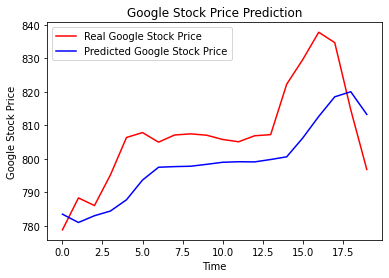

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
